# 보스턴 집값 데이터 회귀분석(라쏘, 릿지, 엘라스틱넷)

In [2]:
# !pip install koreanize-matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")

In [5]:
data.head()

범죄율  25,000평방피트초과  비소매상업지역비율  찰스강경계  농축 일산화질소  가구당평균방수  1940년이전건축비율  \
0  0.00632          18.0       2.31      0     0.538    6.575         65.2   
1  0.02731           0.0       7.07      0     0.469    6.421         78.9   
2  0.02729           0.0       7.07      0     0.469    7.185         61.1   
3  0.03237           0.0       2.18      0     0.458    6.998         45.8   
4  0.06905           0.0       2.18      0     0.458    7.147         54.2   

   직업센터접근성  도로접근성   재산세율  학생/교사비율    흑인비율  하위계층비율  주택가격  
0   4.0900      1  296.0     15.3  396.90    4.98  24.0  
1   4.9671      2  242.0     17.8  396.90    9.14  21.6  
2   4.9671      2  242.0     17.8  392.83    4.03  34.7  
3   6.0622      3  222.0     18.7  394.63    2.94  33.4  
4   6.0622      3  222.0     18.7  396.90    5.33  36.2

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.describe()

범죄율  25,000평방피트초과   비소매상업지역비율       찰스강경계    농축 일산화질소  \
count  506.000000    506.000000  506.000000  506.000000  506.000000   
mean     3.613524     11.363636   11.136779    0.069170    0.554695   
std      8.601545     23.322453    6.860353    0.253994    0.115878   
min      0.006320      0.000000    0.460000    0.000000    0.385000   
25%      0.082045      0.000000    5.190000    0.000000    0.449000   
50%      0.256510      0.000000    9.690000    0.000000    0.538000   
75%      3.677083     12.500000   18.100000    0.000000    0.624000   
max     88.976200    100.000000   27.740000    1.000000    0.871000   

          가구당평균방수  1940년이전건축비율     직업센터접근성       도로접근성        재산세율  \
count  506.000000   506.000000  506.000000  506.000000  506.000000   
mean     6.284634    68.574901    3.795043    9.549407  408.237154   
std      0.702617    28.148861    2.105710    8.707259  168.537116   
min      3.561000     2.900000    1.129600    1.000000  187.000000   
25%      5.885500    45.025000    2.100175    4.000000  279.000000   
50%      6.208500    77.500000    3.207450    5.000000  330.000000   
75%      6.623500    94.075000    5.188425   24.000000  666.000000   
max      8.780000   100.000000   12.126500   24.000000  711.000000   

          학생/교사비율        흑인비율      하위계층비율        주택가격  
count  506.000000  506.000000  506.000000  506.000000  
mean    18.455534  356.674032   12.653063   22.532806  
std      2.164946   91.294864    7.141062    9.197104  
min     12.600000    0.320000    1.730000    5.000000  
25%     17.400000  375.377500    6.950000   17.025000  
50%     19.050000  391.440000   11.360000   21.200000  
75%     20.200000  396.225000   16.955000   25.000000  
max     22.000000  396.900000   37.970000   50.000000

In [8]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

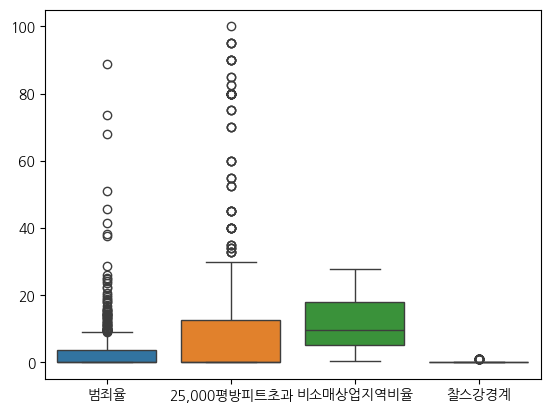

In [9]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계']])

<Axes: >

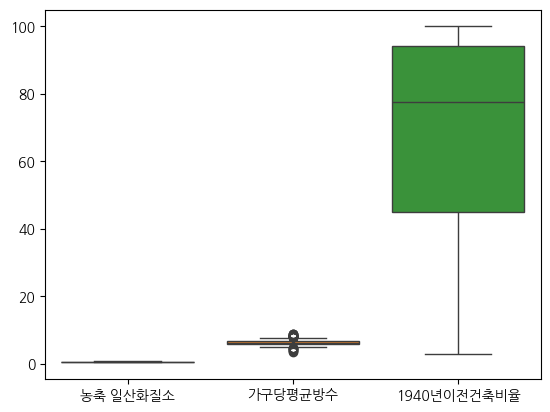

In [10]:
sns.boxplot(data[['농축 일산화질소', '가구당평균방수', '1940년이전건축비율']])

<Axes: >

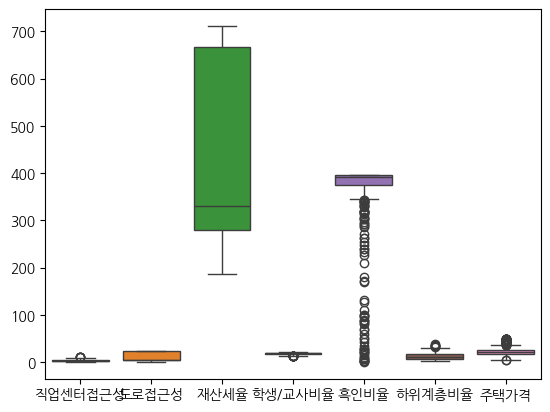

In [11]:
sns.boxplot(data[['직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격']])

In [12]:
outlier = data.describe()

In [13]:
stats = data.describe()

In [14]:
pd.DataFrame([stats.loc['75%'] + (1.5 * (stats.loc['75%'] - stats.loc['25%']))], index=['정상최대값'])

범죄율  25,000평방피트초과  비소매상업지역비율  찰스강경계  농축 일산화질소  가구당평균방수  \
정상최대값  9.069639         31.25     37.465    0.0    0.8865   7.7305   

       1940년이전건축비율  직업센터접근성  도로접근성    재산세율  학생/교사비율       흑인비율   하위계층비율  \
정상최대값       167.65   9.8208   54.0  1246.5     24.4  427.49625  31.9625   

          주택가격  
정상최대값  36.9625

In [15]:
stats =pd.concat([stats, pd.DataFrame([stats.loc['75%'] + (1.5 * (stats.loc['75%'] - stats.loc['25%']))], index=['정상최대값'])])

In [16]:
stats =pd.concat([stats, pd.DataFrame([stats.loc['25%'] - (1.5 * (stats.loc['75%'] - stats.loc['25%']))], index=['정상최소값'])])

In [17]:
stats

범죄율  25,000평방피트초과   비소매상업지역비율       찰스강경계    농축 일산화질소  \
count  506.000000    506.000000  506.000000  506.000000  506.000000   
mean     3.613524     11.363636   11.136779    0.069170    0.554695   
std      8.601545     23.322453    6.860353    0.253994    0.115878   
min      0.006320      0.000000    0.460000    0.000000    0.385000   
25%      0.082045      0.000000    5.190000    0.000000    0.449000   
50%      0.256510      0.000000    9.690000    0.000000    0.538000   
75%      3.677083     12.500000   18.100000    0.000000    0.624000   
max     88.976200    100.000000   27.740000    1.000000    0.871000   
정상최대값    9.069639     31.250000   37.465000    0.000000    0.886500   
정상최소값   -5.310511    -18.750000  -14.175000    0.000000    0.186500   

          가구당평균방수  1940년이전건축비율     직업센터접근성       도로접근성         재산세율  \
count  506.000000   506.000000  506.000000  506.000000   506.000000   
mean     6.284634    68.574901    3.795043    9.549407   408.237154   
std      0.702617    28.148861    2.105710    8.707259   168.537116   
min      3.561000     2.900000    1.129600    1.000000   187.000000   
25%      5.885500    45.025000    2.100175    4.000000   279.000000   
50%      6.208500    77.500000    3.207450    5.000000   330.000000   
75%      6.623500    94.075000    5.188425   24.000000   666.000000   
max      8.780000   100.000000   12.126500   24.000000   711.000000   
정상최대값    7.730500   167.650000    9.820800   54.000000  1246.500000   
정상최소값    4.778500   -28.550000   -2.532200  -26.000000  -301.500000   

          학생/교사비율        흑인비율      하위계층비율        주택가격  
count  506.000000  506.000000  506.000000  506.000000  
mean    18.455534  356.674032   12.653063   22.532806  
std      2.164946   91.294864    7.141062    9.197104  
min     12.600000    0.320000    1.730000    5.000000  
25%     17.400000  375.377500    6.950000   17.025000  
50%     19.050000  391.440000   11.360000   21.200000  
75%     20.200000  396.225000   16.955000   25.000000  
max     22.000000  396.900000   37.970000   50.000000  
정상최대값   24.400000  427.496250   31.962500   36.962500  
정상최소값   13.200000  344.106250   -8.057500    5.062500

In [18]:
uppwer_data = outlier.loc['75%'] + (1.5 * (outlier.loc['75%'] - outlier.loc['25%']))

In [19]:
lower_data = outlier.loc['25%'] - (1.5 * (outlier.loc['75%'] - outlier.loc['25%']))

In [20]:
Q1 = data['범죄율'].quantile(0.25)
Q3 = data['범죄율'].quantile(0.75)
IQR1 = Q3 - Q1

lower_data = Q1 - 1.5 * IQR1
uppwer_data = Q3 + 1.5 * IQR1

# 범위를 벗어나는 이상치 제거
data_cleaned = data[(data['범죄율'] >= lower_data) & (data['범죄율'] <= uppwer_data)]

In [21]:
Q1_2 = data['25,000평방피트초과'].quantile(0.25)
Q3_2 = data['25,000평방피트초과'].quantile(0.75)
IQR2 = Q3_2 - Q1_2

lower_data2 = Q1_2 - 1.5 * IQR2
uppwer_data2 = Q3_2 + 1.5 * IQR2

# 범위를 벗어나는 이상치 제거
data_cleaned = data[(data['25,000평방피트초과'] >= lower_data2) & (data['25,000평방피트초과'] <= uppwer_data2)]

In [22]:
cols = data.columns
cols

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [23]:
for col in cols[:-2]:
    print('='*20, col, '='*20)
    display(data.groupby(col)['주택가격'].describe())
    print()
    print()

==================== 범죄율 ====================


count  mean  std   min   25%   50%   75%   max
범죄율                                                     
0.00632     1.0  24.0  NaN  24.0  24.0  24.0  24.0  24.0
0.00906     1.0  32.2  NaN  32.2  32.2  32.2  32.2  32.2
0.01096     1.0  22.0  NaN  22.0  22.0  22.0  22.0  22.0
0.01301     1.0  32.7  NaN  32.7  32.7  32.7  32.7  32.7
0.01311     1.0  35.4  NaN  35.4  35.4  35.4  35.4  35.4
...         ...   ...  ...   ...   ...   ...   ...   ...
45.74610    1.0   7.0  NaN   7.0   7.0   7.0   7.0   7.0
51.13580    1.0  15.0  NaN  15.0  15.0  15.0  15.0  15.0
67.92080    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
73.53410    1.0   8.8  NaN   8.8   8.8   8.8   8.8   8.8
88.97620    1.0  10.4  NaN  10.4  10.4  10.4  10.4  10.4

[504 rows x 8 columns]



==================== 25,000평방피트초과 ====================


count       mean        std   min     25%    50%     75%   max
25,000평방피트초과                                                                
0.0           372.0  20.473387   8.588108   5.0  14.900  19.75  23.100  50.0
12.5           10.0  20.130000   3.539947  15.0  17.775  19.90  21.925  27.1
17.5            1.0  33.000000        NaN  33.0  33.000  33.00  33.000  33.0
18.0            1.0  24.000000        NaN  24.0  24.000  24.00  24.000  24.0
20.0           21.0  35.466667   9.542606  20.7  30.100  35.20  43.500  50.0
21.0            4.0  22.150000   2.477230  19.7  20.300  21.95  23.800  25.0
22.0           10.0  25.320000   7.124418  17.6  21.450  24.45  25.850  42.8
25.0           10.0  22.440000   3.491323  16.0  20.250  23.10  24.575  28.0
28.0            3.0  22.833333   2.200757  20.6  21.750  22.90  23.950  25.0
30.0            6.0  22.500000   1.387083  20.1  22.050  22.75  23.600  23.7
33.0            4.0  31.525000   3.884478  28.2  28.350  30.90  34.075  36.1
34.0            3.0  27.166667   5.589574  22.0  24.200  26.40  29.750  33.1
35.0            3.0  23.066667   8.421599  17.1  18.250  19.40  26.050  32.7
40.0            7.0  29.900000   3.922584  22.9  27.850  32.00  32.750  33.2
45.0            6.0  33.433333   3.083288  29.8  30.875  33.45  36.025  37.0
52.5            3.0  23.433333   1.266228  22.3  22.750  23.20  24.000  24.8
55.0            3.0  25.700000   4.856954  22.0  22.950  23.90  27.550  31.2
60.0            4.0  25.725000   5.588306  18.6  22.725  26.60  29.600  31.1
70.0            3.0  25.433333   3.295957  22.5  23.650  24.80  26.900  29.0
75.0            3.0  28.200000   8.310836  18.9  24.850  30.80  32.850  34.9
80.0           15.0  27.400000   8.658522  18.2  20.750  24.50  31.800  50.0
82.5            2.0  33.200000  12.869343  24.1  28.650  33.20  37.750  42.3
85.0            2.0  23.900000   1.131371  23.1  23.500  23.90  24.300  24.7
90.0            5.0  38.340000   8.399881  30.1  32.200  35.40  44.000  50.0
95.0            4.0  41.575000   8.920902  32.9  34.400  41.70  48.875  50.0
100.0           1.0  31.600000        NaN  31.6  31.600  31.60  31.600  31.6



==================== 비소매상업지역비율 ====================


count       mean        std   min     25%    50%     75%   max
비소매상업지역비율                                                                
0.46         1.0  50.000000        NaN  50.0  50.000  50.00  50.000  50.0
0.74         1.0  24.700000        NaN  24.7  24.700  24.70  24.700  24.7
1.21         1.0  50.000000        NaN  50.0  50.000  50.00  50.000  50.0
1.22         1.0  35.400000        NaN  35.4  35.400  35.40  35.400  35.4
1.25         2.0  24.750000   2.616295  22.9  23.825  24.75  25.675  26.6
...          ...        ...        ...   ...     ...    ...     ...   ...
18.10      132.0  16.403788   8.539745   5.0  11.225  14.40  19.900  50.0
19.58       30.0  23.650000  11.963126  11.8  15.600  19.50  24.175  50.0
21.89       15.0  17.093333   2.560543  13.3  15.000  17.40  18.250  23.0
25.65        7.0  19.428571   2.281603  15.7  18.050  20.30  20.950  22.0
27.74        5.0  12.800000   5.371685   7.0   8.100  13.60  15.200  20.1

[76 rows x 8 columns]



==================== 찰스강경계 ====================


count       mean        std   min   25%   50%    75%   max
찰스강경계                                                            
0      471.0  22.093843   8.831362   5.0  16.6  20.9  24.80  50.0
1       35.0  28.440000  11.816643  13.4  21.1  23.3  33.15  50.0



==================== 농축 일산화질소 ====================


count       mean       std   min     25%    50%     75%   max
농축 일산화질소                                                               
0.385       1.0  20.100000       NaN  20.1  20.100  20.10  20.100  20.1
0.389       1.0  22.000000       NaN  22.0  22.000  22.00  22.000  22.0
0.392       2.0  21.400000  0.707107  20.9  21.150  21.40  21.650  21.9
0.394       1.0  44.000000       NaN  44.0  44.000  44.00  44.000  44.0
0.398       2.0  21.450000  2.899138  19.4  20.425  21.45  22.475  23.5
...         ...        ...       ...   ...     ...    ...     ...   ...
0.713      18.0  15.527778  2.575177  11.7  13.650  14.90  17.375  20.2
0.718       6.0  18.433333  6.750309   8.4  14.825  19.30  21.900  27.5
0.740      13.0  12.646154  3.133320   8.4  10.500  12.60  14.900  18.4
0.770       8.0  20.912500  2.699438  16.8  19.375  21.25  22.625  25.0
0.871      16.0  16.425000  3.165965  11.8  14.400  15.60  18.200  23.3

[81 rows x 8 columns]



==================== 가구당평균방수 ====================


count   mean       std   min     25%    50%     75%   max
가구당평균방수                                                           
3.561      1.0  27.50       NaN  27.5  27.500  27.50  27.500  27.5
3.863      1.0  23.10       NaN  23.1  23.100  23.10  23.100  23.1
4.138      2.0  12.85  1.343503  11.9  12.375  12.85  13.325  13.8
4.368      1.0   8.80       NaN   8.8   8.800   8.80   8.800   8.8
4.519      1.0   7.00       NaN   7.0   7.000   7.00   7.000   7.0
...        ...    ...       ...   ...     ...    ...     ...   ...
8.375      1.0  50.00       NaN  50.0  50.000  50.00  50.000  50.0
8.398      1.0  48.80       NaN  48.8  48.800  48.80  48.800  48.8
8.704      1.0  50.00       NaN  50.0  50.000  50.00  50.000  50.0
8.725      1.0  50.00       NaN  50.0  50.000  50.00  50.000  50.0
8.780      1.0  21.90       NaN  21.9  21.900  21.90  21.900  21.9

[446 rows x 8 columns]



==================== 1940년이전건축비율 ====================


count       mean        std   min     25%    50%     75%   max
1940년이전건축비율                                                                
2.9            1.0  26.600000        NaN  26.6  26.600  26.60  26.600  26.6
6.0            1.0  24.100000        NaN  24.1  24.100  24.10  24.100  24.1
6.2            1.0  23.400000        NaN  23.4  23.400  23.40  23.400  23.4
6.5            1.0  24.700000        NaN  24.7  24.700  24.70  24.700  24.7
6.6            2.0  24.750000   0.777817  24.2  24.475  24.75  25.025  25.3
...            ...        ...        ...   ...     ...    ...     ...   ...
98.8           4.0  14.500000   2.342363  13.1  13.250  13.45  14.700  18.0
98.9           3.0  13.066667   5.519360   8.5  10.000  11.50  15.350  19.2
99.1           1.0  10.900000        NaN  10.9  10.900  10.90  10.900  10.9
99.3           1.0  17.800000        NaN  17.8  17.800  17.80  17.800  17.8
100.0         43.0  16.920930  10.056875   5.0  10.900  14.50  19.000  50.0

[356 rows x 8 columns]



==================== 직업센터접근성 ====================


count   mean       std   min     25%    50%     75%   max
직업센터접근성                                                           
1.1296     1.0  50.00       NaN  50.0  50.000  50.00  50.000  50.0
1.1370     1.0  13.80       NaN  13.8  13.800  13.80  13.800  13.8
1.1691     1.0  50.00       NaN  50.0  50.000  50.00  50.000  50.0
1.1742     1.0  13.80       NaN  13.8  13.800  13.80  13.800  13.8
1.1781     1.0  11.90       NaN  11.9  11.900  11.90  11.900  11.9
...        ...    ...       ...   ...     ...    ...     ...   ...
9.2203     2.0  21.40  0.707107  20.9  21.150  21.40  21.650  21.9
9.2229     1.0  33.00       NaN  33.0  33.000  33.00  33.000  33.0
10.5857    2.0  19.40  1.697056  18.2  18.800  19.40  20.000  20.6
10.7103    2.0  21.35  3.889087  18.6  19.975  21.35  22.725  24.1
12.1265    1.0  30.10       NaN  30.1  30.100  30.10  30.100  30.1

[412 rows x 8 columns]



==================== 도로접근성 ====================


count       mean       std   min     25%    50%     75%   max
도로접근성                                                               
1       20.0  24.365000  8.024454  11.9  20.475  22.20  27.225  50.0
2       24.0  26.833333  7.874376  15.7  21.400  23.85  33.225  43.8
3       38.0  27.928947  8.324692  14.4  21.125  26.50  34.525  50.0
4      110.0  21.387273  6.957883   7.0  17.575  20.45  23.650  50.0
5      115.0  25.706957  9.328401  11.8  19.500  23.00  30.000  50.0
6       26.0  20.976923  2.312801  16.8  18.900  21.20  23.025  24.8
7       17.0  27.105882  6.493215  17.6  24.300  26.20  29.600  42.8
8       24.0  30.358333  9.727724  16.0  23.825  28.25  33.175  50.0
24     132.0  16.403788  8.539745   5.0  11.225  14.40  19.900  50.0



==================== 재산세율 ====================


count       mean       std   min     25%   50%     75%   max
재산세율                                                               
187.0    1.0  30.100000       NaN  30.1  30.100  30.1  30.100  30.1
188.0    7.0  19.428571  2.281603  15.7  18.050  20.3  20.950  22.0
193.0    8.0  36.200000  7.177146  26.4  31.775  36.7  38.375  50.0
198.0    1.0  50.000000       NaN  50.0  50.000  50.0  50.000  50.0
216.0    5.0  38.980000  6.207415  33.0  35.100  35.4  45.400  46.0
...      ...        ...       ...   ...     ...   ...     ...   ...
432.0    9.0  19.688889  1.498703  18.3  18.700  19.2  20.400  22.8
437.0   15.0  17.093333  2.560543  13.3  15.000  17.4  18.250  23.0
469.0    1.0  18.900000       NaN  18.9  18.900  18.9  18.900  18.9
666.0  132.0  16.403788  8.539745   5.0  11.225  14.4  19.900  50.0
711.0    5.0  12.800000  5.371685   7.0   8.100  13.6  15.200  20.1

[66 rows x 8 columns]



==================== 학생/교사비율 ====================


count       mean        std   min     25%    50%     75%   max
학생/교사비율                                                                
12.6       3.0  32.733333   2.205297  30.3  31.800  33.30  33.950  34.6
13.0      12.0  38.025000   8.946927  22.8  30.925  36.25  44.825  50.0
13.6       1.0  50.000000        NaN  50.0  50.000  50.00  50.000  50.0
14.4       1.0  50.000000        NaN  50.0  50.000  50.00  50.000  50.0
14.7      34.0  25.717647  13.102035  11.8  15.600  21.90  26.500  50.0
14.8       3.0  25.433333   3.295957  22.5  23.650  24.80  26.900  29.0
14.9       4.0  40.475000   6.039523  35.1  35.325  40.40  45.550  46.0
15.1       1.0  31.600000        NaN  31.6  31.600  31.60  31.600  31.6
15.2      13.0  26.276923   7.742970  15.0  18.900  27.10  32.000  37.0
15.3       3.0  26.066667   5.404936  22.0  23.000  24.00  28.100  32.2
15.5       1.0  32.700000        NaN  32.7  32.700  32.70  32.700  32.7
15.6       2.0  30.100000   1.414214  29.1  29.600  30.10  30.600  31.1
15.9       2.0  30.250000  19.445436  16.5  23.375  30.25  37.125  44.0
16.0       5.0  24.320000   3.508846  20.3  21.700  23.90  27.100  28.6
16.1       5.0  24.880000   5.246618  19.4  22.000  23.50  26.400  33.1
16.4       6.0  23.216667   2.834372  20.9  21.600  22.45  23.225  28.7
16.6      16.0  23.856250   2.514748  20.1  22.525  23.25  23.925  29.9
16.8       4.0  22.150000   2.477230  19.7  20.300  21.95  23.800  25.0
16.9       5.0  19.640000   1.962906  17.1  19.300  19.40  19.800  22.6
17.0       4.0  30.600000   4.518112  24.5  28.700  31.50  33.400  34.9
17.3       1.0  24.700000        NaN  24.7  24.700  24.70  24.700  24.7
17.4      18.0  33.544444   9.045065  21.7  26.900  31.50  40.675  50.0
17.6       7.0  30.700000   3.307567  23.9  30.150  32.00  32.750  33.2
17.8      23.0  26.956522   8.748913  18.3  19.850  22.80  33.600  50.0
17.9      11.0  22.363636   5.694431  14.4  19.350  21.20  25.000  35.4
18.0       5.0  33.100000   8.729834  21.4  28.400  33.20  38.700  43.8
18.2       4.0  22.150000   2.257580  20.1  20.475  21.75  23.425  25.0
18.3       4.0  27.100000   7.206016  18.6  22.725  27.45  31.825  34.9
18.4      16.0  23.131250   5.741860  16.1  19.700  21.85  24.900  36.1
18.5       4.0  23.800000   2.008316  22.2  22.425  23.20  24.575  26.6
18.6      17.0  24.335294   4.285140  19.3  21.700  23.70  25.000  35.2
18.7       9.0  25.122222   6.149142  20.0  20.800  21.40  28.700  36.2
18.8       2.0  17.350000   0.212132  17.2  17.275  17.35  17.425  17.5
18.9       3.0  20.100000   2.402082  17.4  19.150  20.90  21.450  22.0
19.0       4.0  24.900000   2.207563  22.9  23.650  24.35  25.600  28.0
19.1      17.0  22.894118   6.279776  15.7  18.800  21.40  24.500  42.8
19.2      19.0  22.805263   4.729749  16.8  19.850  21.80  24.350  37.3
19.6       8.0  22.575000   2.184850  18.5  21.750  23.05  24.000  25.0
19.7       8.0  21.787500   3.484430  16.0  19.375  22.55  23.725  26.6
20.1       5.0  12.800000   5.371685   7.0   8.100  13.60  15.200  20.1
20.2     140.0  16.611429   8.338669   5.0  11.650  14.90  20.025  50.0
20.9      11.0  21.118182   3.019211  18.6  19.450  19.80  21.050  27.5
21.0      27.0  17.351852   3.599826  11.9  14.200  17.50  20.300  23.9
21.1       1.0  18.900000        NaN  18.9  18.900  18.90  18.900  18.9
21.2      15.0  17.093333   2.560543  13.3  15.000  17.40  18.250  23.0
22.0       2.0  19.400000   1.697056  18.2  18.800  19.40  20.000  20.6



==================== 흑인비율 ====================


count       mean      std   min   25%   50%   75%   max
흑인비율                                                           
0.32      1.0  13.400000      NaN  13.4  13.4  13.4  13.4  13.4
2.52      1.0  13.400000      NaN  13.4  13.4  13.4  13.4  13.4
2.60      1.0  15.000000      NaN  15.0  15.0  15.0  15.0  15.0
3.50      1.0  13.500000      NaN  13.5  13.5  13.5  13.5  13.5
3.65      1.0  11.700000      NaN  11.7  11.7  11.7  11.7  11.7
...       ...        ...      ...   ...   ...   ...   ...   ...
396.28    1.0  24.400000      NaN  24.4  24.4  24.4  24.4  24.4
396.30    1.0  19.400000      NaN  19.4  19.4  19.4  19.4  19.4
396.33    1.0  25.000000      NaN  25.0  25.0  25.0  25.0  25.0
396.42    1.0  16.200000      NaN  16.2  16.2  16.2  16.2  16.2
396.90  121.0  21.059504  7.57217   5.0  15.6  20.6  23.9  42.8

[357 rows x 8 columns]

In [24]:
data.corr(method = 'spearman')

범죄율  25,000평방피트초과  비소매상업지역비율     찰스강경계  농축 일산화질소   가구당평균방수  \
범죄율           1.000000     -0.571660   0.735524  0.041537  0.821465 -0.309116   
25,000평방피트초과 -0.571660      1.000000  -0.642811 -0.041937 -0.634828  0.361074   
비소매상업지역비율     0.735524     -0.642811   1.000000  0.089841  0.791189 -0.415301   
찰스강경계         0.041537     -0.041937   0.089841  1.000000  0.068426  0.058813   
농축 일산화질소      0.821465     -0.634828   0.791189  0.068426  1.000000 -0.310344   
가구당평균방수      -0.309116      0.361074  -0.415301  0.058813 -0.310344  1.000000   
1940년이전건축비율   0.704140     -0.544423   0.679487  0.067792  0.795153 -0.278082   
직업센터접근성      -0.744986      0.614627  -0.757080 -0.080248 -0.880015  0.263168   
도로접근성         0.727807     -0.278767   0.455507  0.024579  0.586429 -0.107492   
재산세율          0.729045     -0.371394   0.664361 -0.044486  0.649527 -0.271898   
학생/교사비율       0.465283     -0.448475   0.433710 -0.136065  0.391309 -0.312923   
흑인비율         -0.360555      0.163135  -0.285840 -0.039810 -0.296662  0.053660   
하위계층비율        0.634760     -0.490074   0.638747 -0.050575  0.636828 -0.640832   
주택가격         -0.558891      0.438179  -0.578255  0.140612 -0.562609  0.633576   

              1940년이전건축비율   직업센터접근성     도로접근성      재산세율   학생/교사비율      흑인비율  \
범죄율              0.704140 -0.744986  0.727807  0.729045  0.465283 -0.360555   
25,000평방피트초과    -0.544423  0.614627 -0.278767 -0.371394 -0.448475  0.163135   
비소매상업지역비율        0.679487 -0.757080  0.455507  0.664361  0.433710 -0.285840   
찰스강경계            0.067792 -0.080248  0.024579 -0.044486 -0.136065 -0.039810   
농축 일산화질소         0.795153 -0.880015  0.586429  0.649527  0.391309 -0.296662   
가구당평균방수         -0.278082  0.263168 -0.107492 -0.271898 -0.312923  0.053660   
1940년이전건축비율      1.000000 -0.801610  0.417983  0.526366  0.355384 -0.228022   
직업센터접근성         -0.801610  1.000000 -0.495806 -0.574336 -0.322041  0.249595   
도로접근성            0.417983 -0.495806  1.000000  0.704876  0.318330 -0.282533   
재산세율             0.526366 -0.574336  0.704876  1.000000  0.453345 -0.329843   
학생/교사비율          0.355384 -0.322041  0.318330  0.453345  1.000000 -0.072027   
흑인비율            -0.228022  0.249595 -0.282533 -0.329843 -0.072027  1.000000   
하위계층비율           0.657071 -0.564262  0.394322  0.534423  0.467259 -0.210562   
주택가격            -0.547562  0.445857 -0.346776 -0.562411 -0.555905  0.185664   

                하위계층비율      주택가격  
범죄율           0.634760 -0.558891  
25,000평방피트초과 -0.490074  0.438179  
비소매상업지역비율     0.638747 -0.578255  
찰스강경계        -0.050575  0.140612  
농축 일산화질소      0.636828 -0.562609  
가구당평균방수      -0.640832  0.633576  
1940년이전건축비율   0.657071 -0.547562  
직업센터접근성      -0.564262  0.445857  
도로접근성         0.394322 -0.346776  
재산세율          0.534423 -0.562411  
학생/교사비율       0.467259 -0.555905  
흑인비율         -0.210562  0.185664  
하위계층비율        1.000000 -0.852914  
주택가격         -0.852914  1.000000

<Axes: >

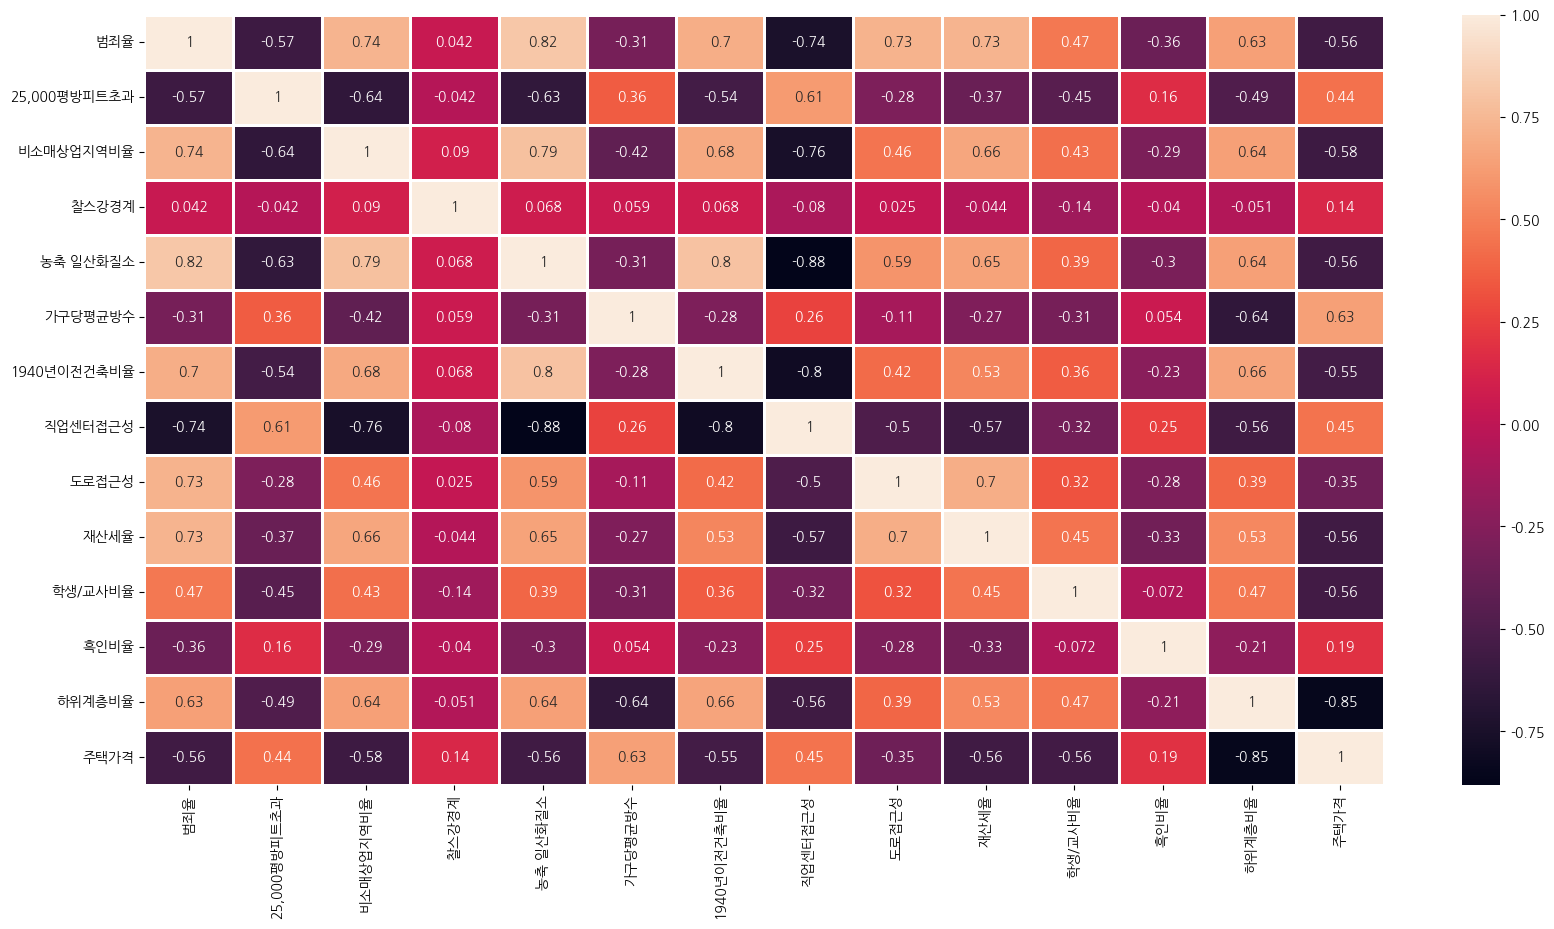

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(method = 'spearman'), annot=True, linewidth=1)

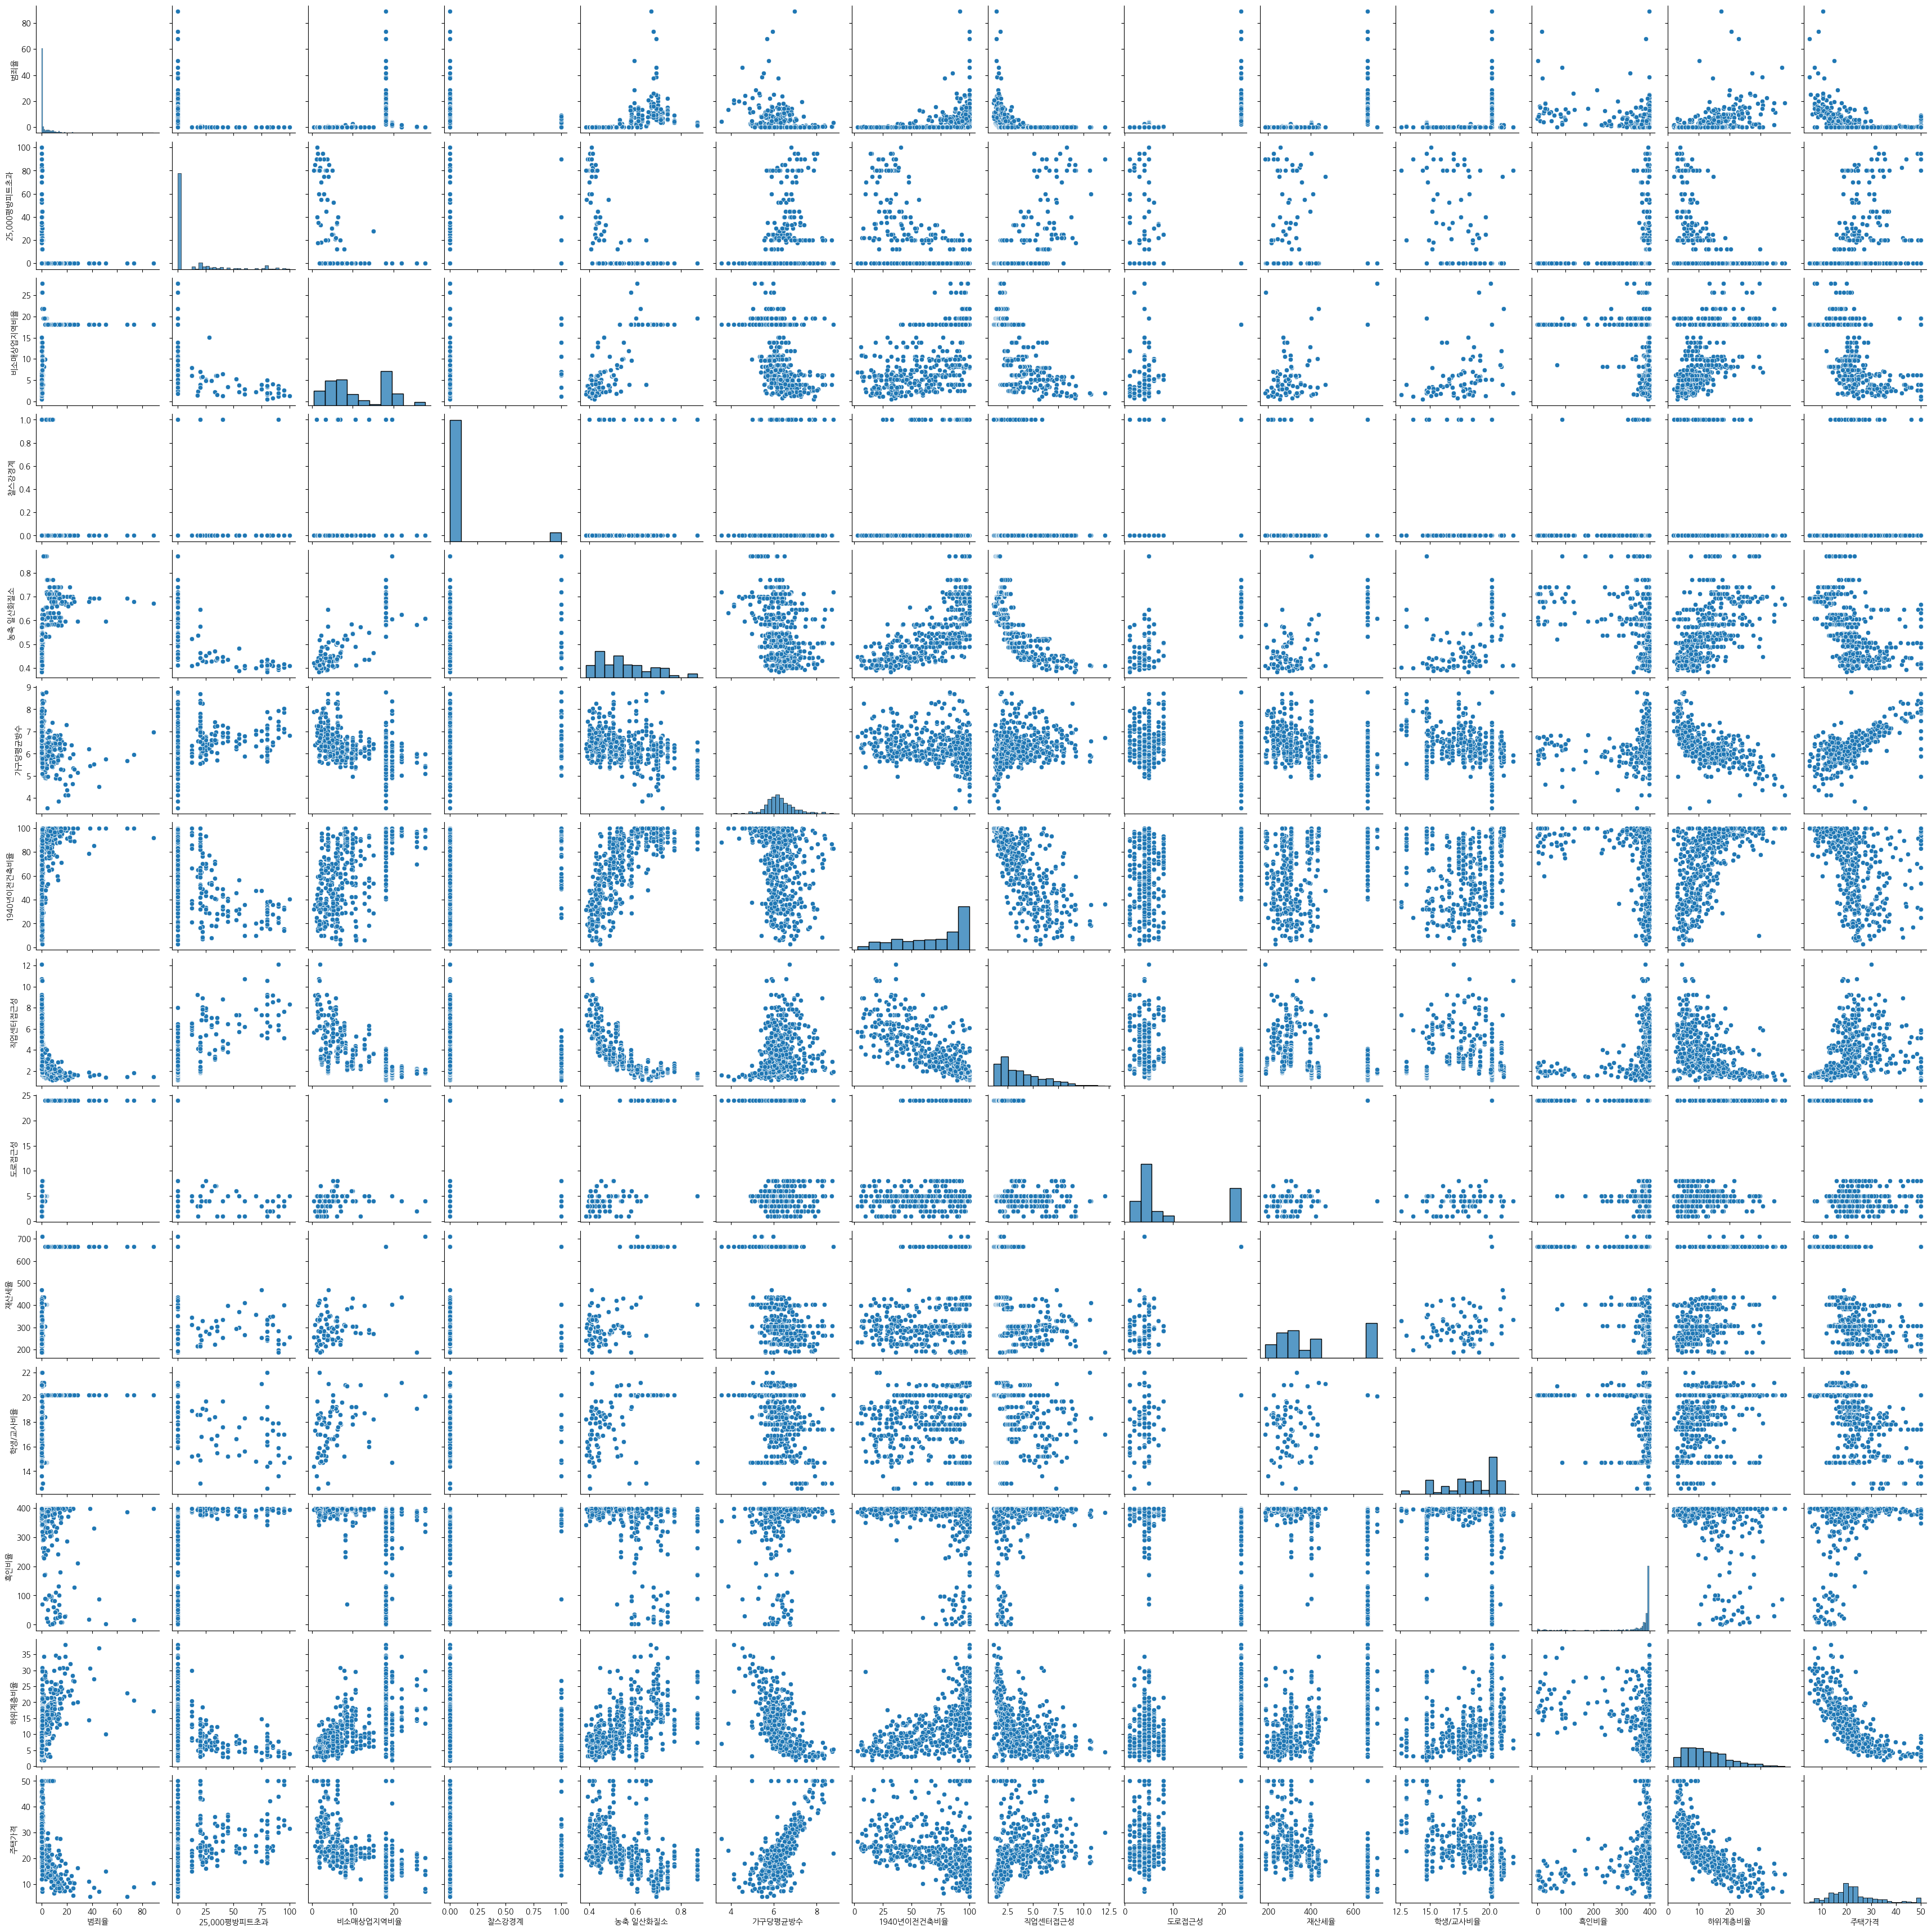

In [26]:
sns.pairplot(data)

In [27]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

In [28]:
X.head()

범죄율  25,000평방피트초과  비소매상업지역비율  찰스강경계  농축 일산화질소  가구당평균방수  1940년이전건축비율  \
0  0.00632          18.0       2.31      0     0.538    6.575         65.2   
1  0.02731           0.0       7.07      0     0.469    6.421         78.9   
2  0.02729           0.0       7.07      0     0.469    7.185         61.1   
3  0.03237           0.0       2.18      0     0.458    6.998         45.8   
4  0.06905           0.0       2.18      0     0.458    7.147         54.2   

   직업센터접근성  도로접근성   재산세율  학생/교사비율    흑인비율  하위계층비율  
0   4.0900      1  296.0     15.3  396.90    4.98  
1   4.9671      2  242.0     17.8  396.90    9.14  
2   4.9671      2  242.0     17.8  392.83    4.03  
3   6.0622      3  222.0     18.7  394.63    2.94  
4   6.0622      3  222.0     18.7  396.90    5.33

이상치가 심하면 - 데이터 스케일링을 뭘 쓰면 좋을지

데이터 스케일링 : standard(평균이 0, 표준 편차가 1), min-max, robust
* standard : 표준 정규분포 - 데이터의 특성이 사라짐, 이상값 취약
* min-max : 모든 데이터를 0~1사이의 숫자로 스케일링, 데이터의 특성(분포) 유지, 이상값 취약
* robust : 사분위수를 이용해서 스케일링, 이상값이 있는 데이터에 사용

In [29]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns =X.columns)
X_scaled

범죄율  25,000평방피트초과  비소매상업지역비율  찰스강경계  농축 일산화질소   가구당평균방수  \
0   -0.069593          1.44  -0.571650    0.0  0.000000  0.496612   
1   -0.063755          0.00  -0.202943    0.0 -0.394286  0.287940   
2   -0.063760          0.00  -0.202943    0.0 -0.394286  1.323171   
3   -0.062347          0.00  -0.581720    0.0 -0.457143  1.069783   
4   -0.052144          0.00  -0.581720    0.0 -0.457143  1.271680   
..        ...           ...        ...    ...       ...       ...   
501 -0.053930          0.00   0.173509    0.0  0.200000  0.521003   
502 -0.058759          0.00   0.173509    0.0  0.200000 -0.119919   
503 -0.054450          0.00   0.173509    0.0  0.200000  1.039973   
504 -0.040867          0.00   0.173509    0.0  0.200000  0.793360   
505 -0.058164          0.00   0.173509    0.0  0.200000 -0.241870   

     1940년이전건축비율   직업센터접근성  도로접근성      재산세율   학생/교사비율      흑인비율    하위계층비율  
0      -0.250765  0.285777  -0.20 -0.087855 -1.339286  0.261902 -0.637681  
1       0.028542  0.569789  -0.15 -0.227390 -0.446429  0.261902 -0.221889  
2      -0.334353  0.569789  -0.15 -0.227390 -0.446429  0.066675 -0.732634  
3      -0.646279  0.924391  -0.10 -0.279070 -0.125000  0.153016 -0.841579  
4      -0.475025  0.924391  -0.10 -0.279070 -0.125000  0.261902 -0.602699  
..           ...       ...    ...       ...       ...       ...       ...  
501    -0.171254 -0.236007  -0.20 -0.147287  0.696429  0.026382 -0.168916  
502    -0.016310 -0.297887  -0.20 -0.147287  0.696429  0.261902 -0.227886  
503     0.275229 -0.336744  -0.20 -0.147287  0.696429  0.261902 -0.571714  
504     0.240571 -0.265053  -0.20 -0.147287  0.696429  0.096414 -0.487756  
505     0.067278 -0.227459  -0.20 -0.147287  0.696429  0.261902 -0.347826  

[506 rows x 13 columns]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

In [32]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# 상수항 추가
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [34]:
ols = sm.OLS(y_train, X_train).fit()
pred = ols.predict(X_test)
print("mean_absolute_error(MAE) :", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE) :", mean_squared_error(y_test, pred))
print('root_mean_squared_error(RMSE) : ', np.sqrt(mean_squared_error(y_test, pred)))
print('r2_score(r-square) :', r2_score(y_test, pred))

mean_absolute_error(MAE) : 3.248482087616423
mean_squared_error(MSE) : 23.616994100563705
root_mean_squared_error(RMSE) :  4.859731895955137
r2_score(r-square) : 0.7555033086871297


In [35]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.67
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.38e-103
Time:                        11:26:22   Log-Likelihood:                -1194.4
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.8954      0.373     61.415   

# 1차 회귀 분석 후 유의하지 않은 컬럼 제거 후 재분석

In [36]:
X_scaled2 = X_scaled.drop(['25,000평방피트초과', '비소매상업지역비율', '1940년이전건축비율'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

In [39]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
# 상수항 추가
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)

In [41]:
ols2 = sm.OLS(y2_train, X2_train).fit()
pred2 = ols2.predict(X2_test)
print("mean_absolute_error(MAE) :", mean_absolute_error(y2_test, pred2))
print("mean_squared_error(MSE) :", mean_squared_error(y2_test, pred2))
print('root_mean_squared_error(RMSE) : ', np.sqrt(mean_squared_error(y2_test, pred2)))
print('r2_score(r-square) :', r2_score(y2_test, pred2))

mean_absolute_error(MAE) : 3.2656420568051523
mean_squared_error(MSE) : 25.500212598176372
root_mean_squared_error(RMSE) :  5.049773519493361
r2_score(r-square) : 0.6522719611720074


In [42]:
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          3.85e-111
Time:                        11:26:22   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     393   BIC:                             2459.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3391      0.356     65.580      0.0

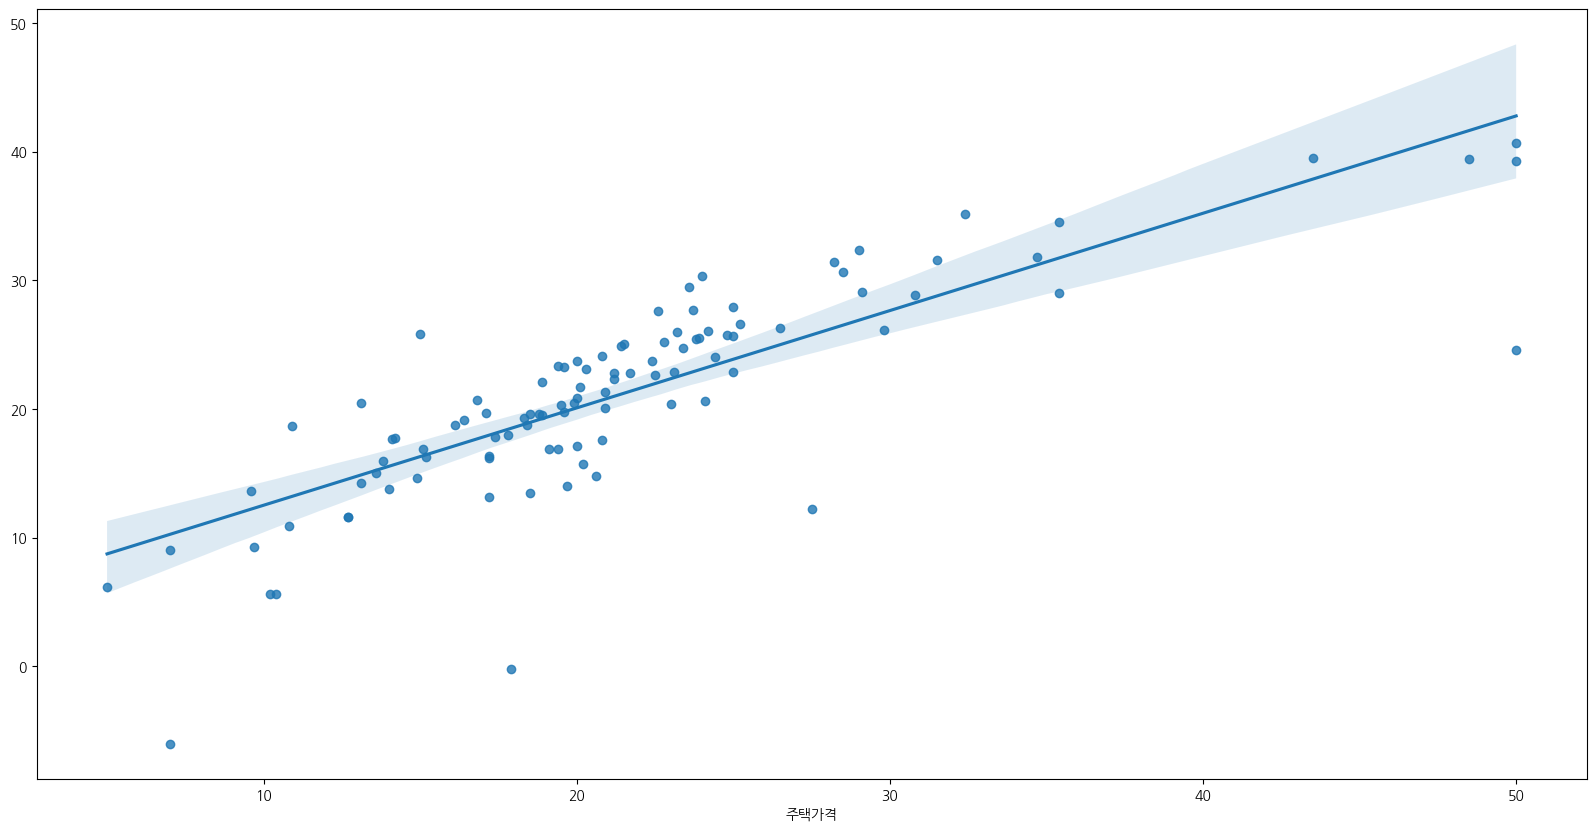

In [43]:
plt.figure(figsize=(20,10))
sns.regplot(x=y2_test, y=pred2, scatter=True)
plt.show()

In [44]:
pd.DataFrame([y2_test, pred2], index=['실제주택가격', '예측가격'])

173        274        491        72         452        76   \
실제주택가격  23.600000  32.400000  13.600000  22.800000  16.100000  20.000000   
예측가격    29.457566  35.132381  15.017187  25.170393  18.751314  23.735487   

              316        140        471        500  ...        131        346  \
실제주택가격  17.800000  14.000000  19.600000  16.800000  ...  19.600000  17.200000   
예측가격    17.990196  13.787003  23.279464  20.726882  ...  19.733644  16.370087   

              365        132        371        412        436        411  \
실제주택가격  27.500000  23.000000  50.000000  17.900000   9.600000  17.200000   
예측가격    12.245023  20.379718  24.609864  -0.198163  13.650055  16.194616   

              86         75   
실제주택가격  22.500000  21.400000  
예측가격    22.607189  24.874674  

[2 rows x 102 columns]

In [45]:
result_df = pd.DataFrame([y2_test, pred2], index=['실제주택가격', '예측가격']).T
result_df

실제주택가격       예측가격
173    23.6  29.457566
274    32.4  35.132381
491    13.6  15.017187
72     22.8  25.170393
452    16.1  18.751314
..      ...        ...
412    17.9  -0.198163
436     9.6  13.650055
411    17.2  16.194616
86     22.5  22.607189
75     21.4  24.874674

[102 rows x 2 columns]

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr_result = pd.DataFrame(lr.coef_, index=lr.feature_names_in_)
display(lr_result)
print("intercept", lr.intercept_)
print()
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

0
const         0.000000
범죄율          -0.292958
25,000평방피트초과  0.600510
비소매상업지역비율    -0.070637
찰스강경계         3.062606
농축 일산화질소     -2.823954
가구당평균방수       2.710269
1940년이전건축비율  -0.417673
직업센터접근성      -4.686137
도로접근성         5.745420
재산세율         -4.690734
학생/교사비율      -2.587650
흑인비율          0.198773
하위계층비율       -4.861385

intercept 22.895367638964718

mean_absolute_error(MAE): 3.2484820876164213
mean_squared_error(MSE): 23.616994100563662
root_mean_squared_error(RMSE): 4.859731895955132
r2_score(r-squared): 0.7555033086871301


# 라쏘(L1 제약, 절대값으로 제약, 변수를 분석에서 제외)

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("intercept", lasso.intercept_)
print()
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

0
const         0.000000
범죄율          -0.207180
25,000평방피트초과  0.146630
비소매상업지역비율    -0.000000
찰스강경계         0.000000
농축 일산화질소     -0.000000
가구당평균방수       3.336152
1940년이전건축비율  -0.000000
직업센터접근성      -0.000000
도로접근성        -0.000000
재산세율         -0.000000
학생/교사비율      -1.139556
흑인비율          0.274372
하위계층비율       -3.023578

intercept 22.907604997571607

mean_absolute_error(MAE): 3.861258953130144
mean_squared_error(MSE): 32.760505842270334
root_mean_squared_error(RMSE): 5.723679397229577
r2_score(r-squared): 0.6608444220266003


for i in range(1,11):
    lasso = Lasso(alpha=i)
    print('alpha :', i)
    
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
    display(lasso_result)
    print("intercept", lasso.intercept_)
    print()
    print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
    print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
    print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
    print("r2_score(r-squared):", r2_score(y_test, pred))


# 릿지(L2제약, 가중치의 제곱합을 이용해서 제약, 변수를 0에 가깝게 만들어 무력화)

In [1]:
from sklearn.linear_model import Ridge

In [50]:
ridge = Ridge(alpha=3.0)
ridge.fit(X2_train, y2_train)
pred = ridge.predict(X2_test)
print('Mean_squared_error(MES):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMES):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test, pred))

Mean_squared_error(MES): 25.9195501249001
Root_Mean_squared_error(RMES): 5.091124642443956
R-squared: 0.6465537572467174


In [52]:
ridge = Ridge(alpha=30.0)
ridge.fit(X2_train, y2_train)
pred = ridge.predict(X2_test)
print('Mean_squared_error(MES):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMES):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test, pred))

Mean_squared_error(MES): 27.381341658904528
Root_Mean_squared_error(RMES): 5.232718381386918
R-squared: 0.6266203586000303


# Elasticnet(Lasso와 Ridge를 동시에 사용, L1규제, L2규제 조합)

In [53]:
from sklearn.linear_model import ElasticNet

In [56]:
el_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
el_net.fit(X2_train, y2_train)
pred = el_net.predict(X2_test)
print('Mean_squared_error(MES):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMES):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test, pred))

Mean_squared_error(MES): 33.22143979083291
Root_Mean_squared_error(RMES): 5.76380428110054
R-squared: 0.5469831452960239


# Tree기반의 회귀분석
* DecisionTree
* XGboost
* LightGBM
* RandomForest

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
for i in range(1,11):
    dtr = DecisionTreeRegressor(max_depth = i, random_state=7)
    dtr.fit(X2_train, y2_train)
    pred = dtr.predict(X2_test)
    print('max_depth : ', i)
    print('Mean_squared_error(MES):', mean_squared_error(y2_test, pred))
    print('Root_Mean_squared_error(RMES):', np.sqrt(mean_squared_error(y2_test, pred)))
    print('R-squared:', r2_score(y2_test, pred))

max_depth :  1
Mean_squared_error(MES): 46.91780325106487
Root_Mean_squared_error(RMES): 6.8496571630312175
R-squared: 0.3602156982888397
max_depth :  2
Mean_squared_error(MES): 25.993190895971193
Root_Mean_squared_error(RMES): 5.098351782289174
R-squared: 0.6455495710736121
max_depth :  3
Mean_squared_error(MES): 16.766567150642494
Root_Mean_squared_error(RMES): 4.094699885295929
R-squared: 0.7713663958398644
max_depth :  4
Mean_squared_error(MES): 19.926545446513245
Root_Mean_squared_error(RMES): 4.463915931837566
R-squared: 0.7282760470307436
max_depth :  5
Mean_squared_error(MES): 7.663269666462047
Root_Mean_squared_error(RMES): 2.7682611268559993
R-squared: 0.8955015091788113
max_depth :  6
Mean_squared_error(MES): 20.234113763347466
Root_Mean_squared_error(RMES): 4.498234516268296
R-squared: 0.7240819593459202
max_depth :  7
Mean_squared_error(MES): 21.114044794683306
Root_Mean_squared_error(RMES): 4.5950021539367425
R-squared: 0.7120829734295366
max_depth :  8
Mean_squared_error

In [105]:
pd.DataFrame([dtr.feature_importances_], columns =dtr.feature_names_in_).T.sort_values(by=0, ascending=False)

0
가구당평균방수   0.591193
하위계층비율    0.197614
범죄율       0.079934
직업센터접근성   0.076335
학생/교사비율   0.016686
흑인비율      0.015255
재산세율      0.011555
농축 일산화질소  0.008947
도로접근성     0.002166
찰스강경계     0.000314
const     0.000000

[Text(0.5, 0.875, 'x[4] <= 0.993\nsquared_error = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(0.25, 0.625, 'x[10] <= 0.304\nsquared_error = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= -0.59\nsquared_error = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[1] <= 1.855\nsquared_error = 19.005\nsamples = 134\nvalue = 14.829'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[4] <= 1.665\nsquared_error = 74.684\nsamples = 67\nvalue = 37.131'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 1.985\nsquared_error = 38.306\nsamples = 41\nvalue = 32.363'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[1] <= 0.691\nsquared_error = 39.671\nsamples = 26\nvalue = 44.65'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '

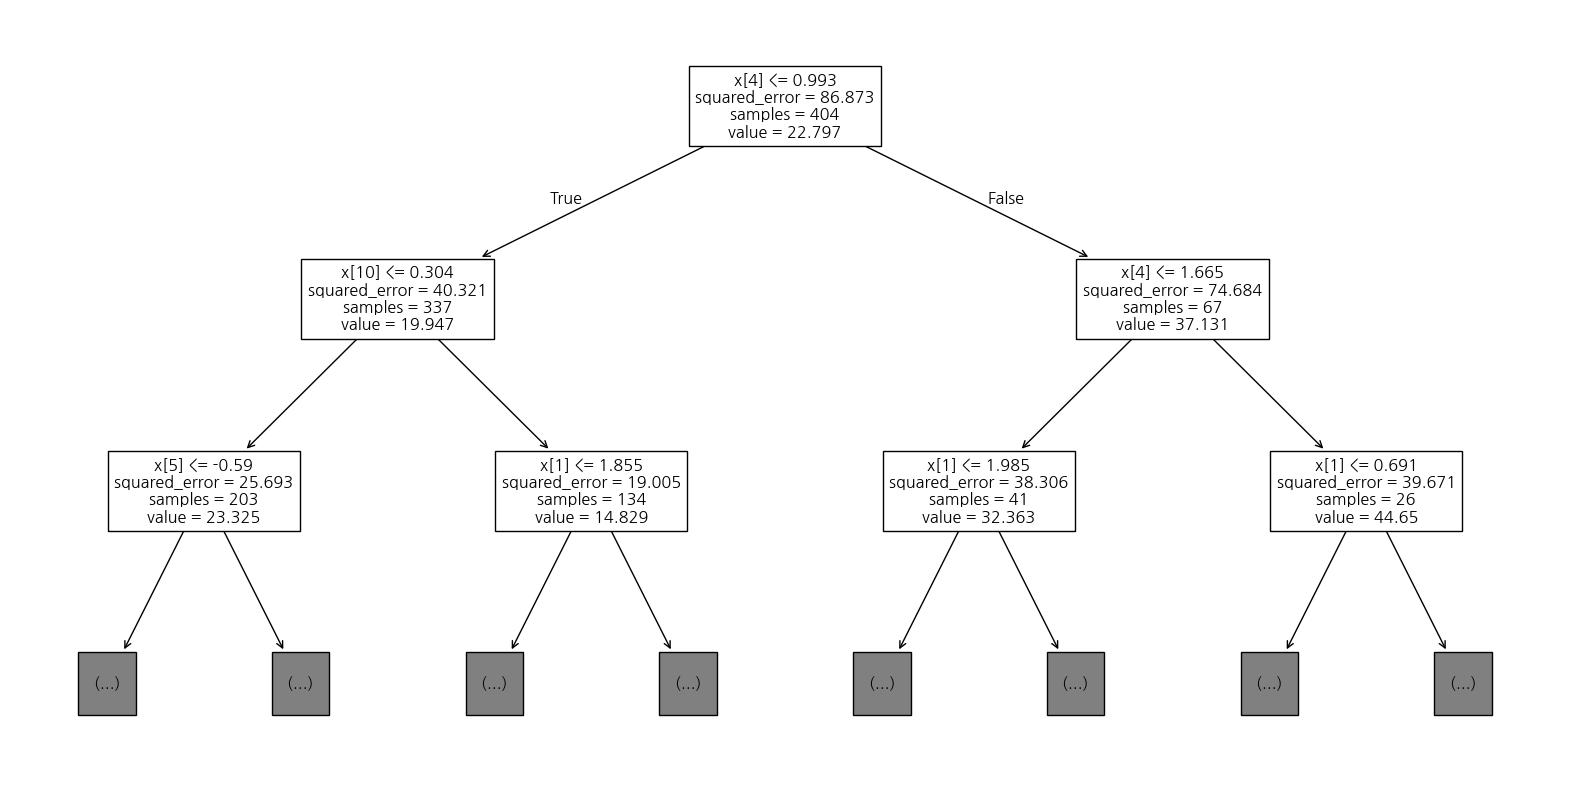

In [106]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=2)

# XGBoostRegressor를 사용한 분석

In [66]:
from xgboost import XGBRegressor

In [69]:
xgb = XGBRegressor(n_estimators=500, max_depth=3, n_jobs=-1, random_state=7)
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MES):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMES):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test, pred))

Mean_squared_error(MES): 7.374535881372344
Root_Mean_squared_error(RMES): 2.7156096702899597
R-squared: 0.8994387639152603


In [73]:
for i in range(1,11):
    xgb = XGBRegressor(n_estimators=500, max_depth=i, n_jobs=-1, random_state=7)
    xgb.fit(X2_train, y2_train)
    pred = xgb.predict(X2_test)
    print('max_depth : ', i)
    print('Mean_squared_error(MES):', mean_squared_error(y2_test, pred))
    print('Root_Mean_squared_error(RMES):', np.sqrt(mean_squared_error(y2_test, pred)))
    print('R-squared:', r2_score(y2_test, pred))
    print()

max_depth :  1
Mean_squared_error(MES): 8.480316562943871
Root_Mean_squared_error(RMES): 2.9120983092855695
R-squared: 0.8843600289323117

max_depth :  2
Mean_squared_error(MES): 6.401683893160884
Root_Mean_squared_error(RMES): 2.530154914854204
R-squared: 0.9127048460166651

max_depth :  3
Mean_squared_error(MES): 7.374535881372344
Root_Mean_squared_error(RMES): 2.7156096702899597
R-squared: 0.8994387639152603

max_depth :  4
Mean_squared_error(MES): 6.682936239787738
Root_Mean_squared_error(RMES): 2.5851375668980823
R-squared: 0.9088696102698337

max_depth :  5
Mean_squared_error(MES): 6.288947716545036
Root_Mean_squared_error(RMES): 2.5077774455770663
R-squared: 0.9142421480861544

max_depth :  6
Mean_squared_error(MES): 6.899478720898929
Root_Mean_squared_error(RMES): 2.6266858816575174
R-squared: 0.9059167763673772

max_depth :  7
Mean_squared_error(MES): 8.380394699280398
Root_Mean_squared_error(RMES): 2.8948911377252857
R-squared: 0.8857225914424856

max_depth :  8
Mean_squared_

In [76]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00


In [79]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [83]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

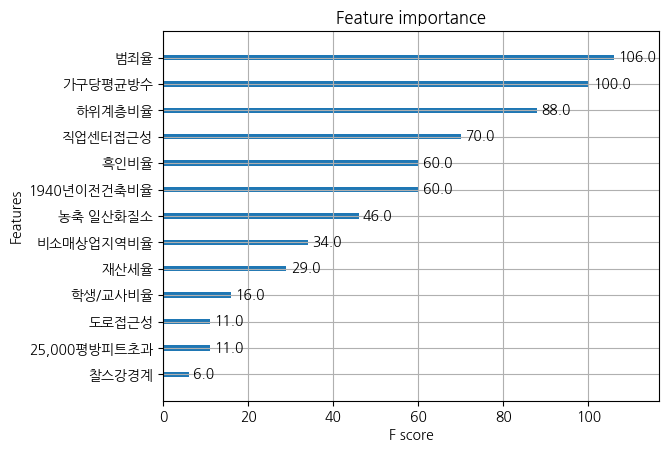

In [84]:
xgb.plot_importance(model)
plt.show()

XGBoost에서 L1, L2 제약 조건 추가하기
* lambda(L2 reg-form) L2 제약조건을 추가할 때 사용 Ridge

In [85]:
xgb = XGBRegressor(n_estimators = 500, max_depth = 5, reg_alpha =10.0, reg_lambda=10.0, n_jobs =-1, random_state = 7)
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_Squared_error(MSE):', mean_squared_error(y2_test, pred))
print("Root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y2_test, pred)))
print("R2_score(r-squared):", r2_score(y2_test, pred))

Mean_Squared_error(MSE): 8.354701566821744
Root_mean_squared_error(RMSE): 2.8904500630216297
R2_score(r-squared): 0.8860729501905469


In [92]:
pd.DataFrame([xgb.feature_importances_], columns=xgb.feature_names_in_).T.sort_values(by=0, ascending=False)

0
하위계층비율    0.387917
가구당평균방수   0.310637
찰스강경계     0.103424
농축 일산화질소  0.051427
직업센터접근성   0.039324
학생/교사비율   0.038031
범죄율       0.022580
재산세율      0.021963
도로접근성     0.018361
흑인비율      0.006336
const     0.000000

In [94]:
result = pd.DataFrame()
result = pd.concat([pd.DataFrame(y2_test.values, columns=['y2_test']), pd.DataFrame(pred, columns=['pred'])], axis=1)

In [95]:
result

y2_test       pred
0       23.6  28.638920
1       32.4  32.161049
2       13.6  17.323727
3       22.8  22.870916
4       16.1  16.277338
..       ...        ...
97      17.9  12.248881
98       9.6  12.575572
99      17.2  13.667603
100     22.5  19.910215
101     21.4  24.950321

[102 rows x 2 columns]

# LightGBMRegreesor를 사용한 분석

In [96]:
from lightgbm import LGBMRegressor

In [98]:
lgbmr = LGBMRegressor(n_estimators=500, reg_alpha=10.0, reg_lambda=10.0, n_jobs=-1, random_state=7, verbose=-1)
lgbmr.fit(X2_train, y2_train)
pred = lgbmr.predict(X2_test)
print('Mean_Squared_error(MSE):', mean_squared_error(y2_test, pred))
print("Root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y2_test, pred)))
print("R2_score(r-squared):", r2_score(y2_test, pred))

Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


In [99]:
lgbmr = LGBMRegressor(n_estimators=500, n_jobs=-1, random_state=7, verbose=-1)
lgbmr.fit(X2_train, y2_train)
pred = lgbmr.predict(X2_test)
print('Mean_Squared_error(MSE):', mean_squared_error(y2_test, pred))
print("Root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y2_test, pred)))
print("R2_score(r-squared):", r2_score(y2_test, pred))

Mean_Squared_error(MSE): 7.867840497419641
Root_mean_squared_error(RMSE): 2.8049671116467016
R2_score(r-squared): 0.892711924049808


In [100]:
for i in range(1,11):
    lgbmr = LGBMRegressor(n_estimators=500, reg_alpha=10.0, reg_lambda=10.0, n_jobs=-1, random_state=7, verbose=-1)
    lgbmr.fit(X2_train, y2_train)
    pred = lgbmr.predict(X2_test)
    print('max_depth : ', i)
    print('Mean_Squared_error(MSE):', mean_squared_error(y2_test, pred))
    print("Root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y2_test, pred)))
    print("R2_score(r-squared):", r2_score(y2_test, pred))
    print('\n')

max_depth :  1
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


max_depth :  2
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


max_depth :  3
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


max_depth :  4
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


max_depth :  5
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


max_depth :  6
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.7951444214550256
R2_score(r-squared): 0.8934620307299479


max_depth :  7
Mean_Squared_error(MSE): 7.812832336791151
Root_mean_squared_error(RMSE): 2.795144421

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rfr = RandomForestRegressor(n_estimators=500,max_depth=5, random_state=7)
rfr.fit(X2_train, y2_train)
pred = rfr.predict(X2_test)
print('Mean_Squared_error(MSE):', mean_squared_error(y2_test, pred))
print("Root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y2_test, pred)))
print("R2_score(r-squared):", r2_score(y2_test, pred))

Mean_Squared_error(MSE): 9.55928161073301
Root_mean_squared_error(RMSE): 3.091808792718756
R2_score(r-squared): 0.8696469594397657


### 내가 한거

In [14]:
data.groupby('주택가격')['범죄율'].value_counts()

주택가격  범죄율     
5.0   38.35180    1
      67.92080    1
5.6   25.04610    1
6.3   9.91655     1
7.0   0.18337     1
                 ..
50.0  4.89822     1
      5.66998     1
      6.53876     1
      8.26725     1
      9.23230     1
Name: count, Length: 506, dtype: int64

In [15]:
data.groupby('주택가격')['범죄율'].unique().describe()

count                    229
unique                   229
top       [38.3518, 67.9208]
freq                       1
Name: 범죄율, dtype: object

In [18]:
sorted(data.groupby('범죄율')['주택가격'].mean())

[5.0,
 5.0,
 5.6,
 6.3,
 7.0,
 7.0,
 7.2,
 7.2,
 7.2,
 7.4,
 7.5,
 8.1,
 8.3,
 8.3,
 8.4,
 8.4,
 8.5,
 8.5,
 8.7,
 8.8,
 8.8,
 9.5,
 9.6,
 9.7,
 10.2,
 10.2,
 10.4,
 10.4,
 10.5,
 10.5,
 10.8,
 10.9,
 10.9,
 11.0,
 11.3,
 11.5,
 11.7,
 11.7,
 11.8,
 11.8,
 11.9,
 11.9,
 12.0,
 12.1,
 12.3,
 12.5,
 12.6,
 12.7,
 12.7,
 12.7,
 12.8,
 13.0,
 13.1,
 13.1,
 13.1,
 13.1,
 13.2,
 13.3,
 13.3,
 13.3,
 13.4,
 13.4,
 13.4,
 13.4,
 13.5,
 13.5,
 13.6,
 13.6,
 13.8,
 13.8,
 13.8,
 13.8,
 13.8,
 13.9,
 13.9,
 14.0,
 14.1,
 14.1,
 14.1,
 14.2,
 14.3,
 14.3,
 14.4,
 14.4,
 14.5,
 14.5,
 14.5,
 14.6,
 14.6,
 14.8,
 14.9,
 14.9,
 14.9,
 15.0,
 15.0,
 15.0,
 15.1,
 15.2,
 15.2,
 15.2,
 15.3,
 15.4,
 15.4,
 15.6,
 15.6,
 15.6,
 15.6,
 15.6,
 15.7,
 15.799999999999999,
 16.0,
 16.1,
 16.1,
 16.1,
 16.2,
 16.2,
 16.3,
 16.4,
 16.5,
 16.5,
 16.6,
 16.6,
 16.7,
 16.7,
 16.8,
 16.8,
 17.0,
 17.1,
 17.1,
 17.1,
 17.2,
 17.2,
 17.2,
 17.3,
 17.4,
 17.4,
 17.4,
 17.5,
 17.5,
 17.5,
 17.6,
 17.7,
 17.8,
 17.8,
 1

In [20]:
data.groupby('범죄율')['주택가격'].describe().sort_values(by='mean')

count  mean  std   min   25%   50%   75%   max
범죄율                                                     
67.92080    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
38.35180    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
25.04610    1.0   5.6  NaN   5.6   5.6   5.6   5.6   5.6
9.91655     1.0   6.3  NaN   6.3   6.3   6.3   6.3   6.3
45.74610    1.0   7.0  NaN   7.0   7.0   7.0   7.0   7.0
...         ...   ...  ...   ...   ...   ...   ...   ...
8.26725     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
5.66998     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
0.52693     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
1.51902     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
4.89822     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0

[504 rows x 8 columns]

In [21]:
data.groupby('범죄율')['주택가격'].describe().sort_values(by='min')

count  mean  std   min   25%   50%   75%   max
범죄율                                                     
67.92080    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
38.35180    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
25.04610    1.0   5.6  NaN   5.6   5.6   5.6   5.6   5.6
9.91655     1.0   6.3  NaN   6.3   6.3   6.3   6.3   6.3
45.74610    1.0   7.0  NaN   7.0   7.0   7.0   7.0   7.0
...         ...   ...  ...   ...   ...   ...   ...   ...
0.61154     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
0.57834     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
0.52693     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
0.02009     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
0.05602     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0

[504 rows x 8 columns]

In [22]:
data.groupby('범죄율')['주택가격'].describe().sort_values(by='max')

count  mean  std   min   25%   50%   75%   max
범죄율                                                     
67.92080    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
38.35180    1.0   5.0  NaN   5.0   5.0   5.0   5.0   5.0
25.04610    1.0   5.6  NaN   5.6   5.6   5.6   5.6   5.6
9.91655     1.0   6.3  NaN   6.3   6.3   6.3   6.3   6.3
45.74610    1.0   7.0  NaN   7.0   7.0   7.0   7.0   7.0
...         ...   ...  ...   ...   ...   ...   ...   ...
8.26725     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
5.66998     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
0.52693     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
1.51902     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0
4.89822     1.0  50.0  NaN  50.0  50.0  50.0  50.0  50.0

[504 rows x 8 columns]

In [32]:
data['범죄율'].unique()

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [33]:
data['범죄율'].nunique()

504

범죄율
0.00632     Axes(0.125,0.11;0.775x0.77)
0.00906     Axes(0.125,0.11;0.775x0.77)
0.01096     Axes(0.125,0.11;0.775x0.77)
0.01301     Axes(0.125,0.11;0.775x0.77)
0.01311     Axes(0.125,0.11;0.775x0.77)
                       ...             
45.74610    Axes(0.125,0.11;0.775x0.77)
51.13580    Axes(0.125,0.11;0.775x0.77)
67.92080    Axes(0.125,0.11;0.775x0.77)
73.53410    Axes(0.125,0.11;0.775x0.77)
88.97620    Axes(0.125,0.11;0.775x0.77)
Name: 주택가격, Length: 504, dtype: object

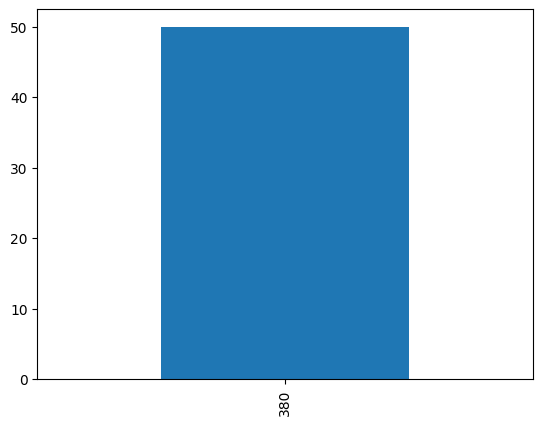

In [30]:
data.groupby('범죄율')['주택가격'].plot(kind='bar')

25,000평방피트초과
0.0      Axes(0.125,0.11;0.775x0.77)
12.5     Axes(0.125,0.11;0.775x0.77)
17.5     Axes(0.125,0.11;0.775x0.77)
18.0     Axes(0.125,0.11;0.775x0.77)
20.0     Axes(0.125,0.11;0.775x0.77)
21.0     Axes(0.125,0.11;0.775x0.77)
22.0     Axes(0.125,0.11;0.775x0.77)
25.0     Axes(0.125,0.11;0.775x0.77)
28.0     Axes(0.125,0.11;0.775x0.77)
30.0     Axes(0.125,0.11;0.775x0.77)
33.0     Axes(0.125,0.11;0.775x0.77)
34.0     Axes(0.125,0.11;0.775x0.77)
35.0     Axes(0.125,0.11;0.775x0.77)
40.0     Axes(0.125,0.11;0.775x0.77)
45.0     Axes(0.125,0.11;0.775x0.77)
52.5     Axes(0.125,0.11;0.775x0.77)
55.0     Axes(0.125,0.11;0.775x0.77)
60.0     Axes(0.125,0.11;0.775x0.77)
70.0     Axes(0.125,0.11;0.775x0.77)
75.0     Axes(0.125,0.11;0.775x0.77)
80.0     Axes(0.125,0.11;0.775x0.77)
82.5     Axes(0.125,0.11;0.775x0.77)
85.0     Axes(0.125,0.11;0.775x0.77)
90.0     Axes(0.125,0.11;0.775x0.77)
95.0     Axes(0.125,0.11;0.775x0.77)
100.0    Axes(0.125,0.11;0.775x0.77)
Name: 주택가격, dtype: object

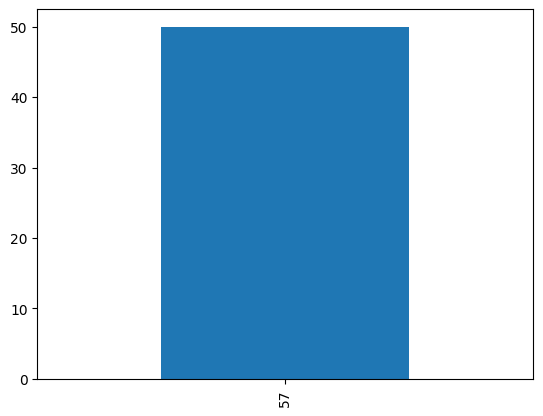

In [28]:
data.groupby('25,000평방피트초과')['주택가격'].plot(kind='bar')

In [23]:
data.groupby('25,000평방피트초과')['주택가격'].describe()

count       mean        std   min     25%    50%     75%   max
25,000평방피트초과                                                                
0.0           372.0  20.473387   8.588108   5.0  14.900  19.75  23.100  50.0
12.5           10.0  20.130000   3.539947  15.0  17.775  19.90  21.925  27.1
17.5            1.0  33.000000        NaN  33.0  33.000  33.00  33.000  33.0
18.0            1.0  24.000000        NaN  24.0  24.000  24.00  24.000  24.0
20.0           21.0  35.466667   9.542606  20.7  30.100  35.20  43.500  50.0
21.0            4.0  22.150000   2.477230  19.7  20.300  21.95  23.800  25.0
22.0           10.0  25.320000   7.124418  17.6  21.450  24.45  25.850  42.8
25.0           10.0  22.440000   3.491323  16.0  20.250  23.10  24.575  28.0
28.0            3.0  22.833333   2.200757  20.6  21.750  22.90  23.950  25.0
30.0            6.0  22.500000   1.387083  20.1  22.050  22.75  23.600  23.7
33.0            4.0  31.525000   3.884478  28.2  28.350  30.90  34.075  36.1
34.0            3.0  27.166667   5.589574  22.0  24.200  26.40  29.750  33.1
35.0            3.0  23.066667   8.421599  17.1  18.250  19.40  26.050  32.7
40.0            7.0  29.900000   3.922584  22.9  27.850  32.00  32.750  33.2
45.0            6.0  33.433333   3.083288  29.8  30.875  33.45  36.025  37.0
52.5            3.0  23.433333   1.266228  22.3  22.750  23.20  24.000  24.8
55.0            3.0  25.700000   4.856954  22.0  22.950  23.90  27.550  31.2
60.0            4.0  25.725000   5.588306  18.6  22.725  26.60  29.600  31.1
70.0            3.0  25.433333   3.295957  22.5  23.650  24.80  26.900  29.0
75.0            3.0  28.200000   8.310836  18.9  24.850  30.80  32.850  34.9
80.0           15.0  27.400000   8.658522  18.2  20.750  24.50  31.800  50.0
82.5            2.0  33.200000  12.869343  24.1  28.650  33.20  37.750  42.3
85.0            2.0  23.900000   1.131371  23.1  23.500  23.90  24.300  24.7
90.0            5.0  38.340000   8.399881  30.1  32.200  35.40  44.000  50.0
95.0            4.0  41.575000   8.920902  32.9  34.400  41.70  48.875  50.0
100.0           1.0  31.600000        NaN  31.6  31.600  31.60  31.600  31.6

비소매상업지역비율
0.46     Axes(0.125,0.11;0.775x0.77)
0.74     Axes(0.125,0.11;0.775x0.77)
1.21     Axes(0.125,0.11;0.775x0.77)
1.22     Axes(0.125,0.11;0.775x0.77)
1.25     Axes(0.125,0.11;0.775x0.77)
                    ...             
18.10    Axes(0.125,0.11;0.775x0.77)
19.58    Axes(0.125,0.11;0.775x0.77)
21.89    Axes(0.125,0.11;0.775x0.77)
25.65    Axes(0.125,0.11;0.775x0.77)
27.74    Axes(0.125,0.11;0.775x0.77)
Name: 주택가격, Length: 76, dtype: object

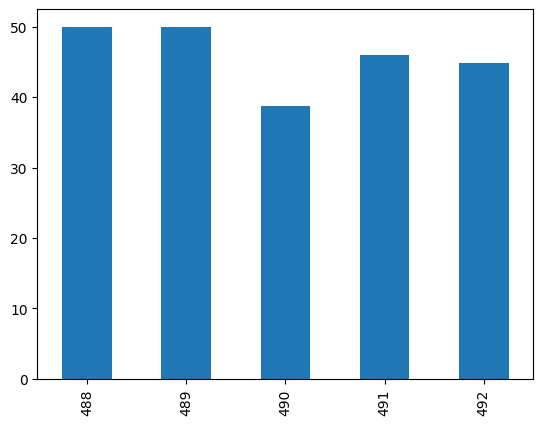

In [31]:
data.groupby('비소매상업지역비율')['주택가격'].plot(kind='bar')

In [24]:
data.groupby('비소매상업지역비율')['주택가격'].describe()

count       mean        std   min     25%    50%     75%   max
비소매상업지역비율                                                                
0.46         1.0  50.000000        NaN  50.0  50.000  50.00  50.000  50.0
0.74         1.0  24.700000        NaN  24.7  24.700  24.70  24.700  24.7
1.21         1.0  50.000000        NaN  50.0  50.000  50.00  50.000  50.0
1.22         1.0  35.400000        NaN  35.4  35.400  35.40  35.400  35.4
1.25         2.0  24.750000   2.616295  22.9  23.825  24.75  25.675  26.6
...          ...        ...        ...   ...     ...    ...     ...   ...
18.10      132.0  16.403788   8.539745   5.0  11.225  14.40  19.900  50.0
19.58       30.0  23.650000  11.963126  11.8  15.600  19.50  24.175  50.0
21.89       15.0  17.093333   2.560543  13.3  15.000  17.40  18.250  23.0
25.65        7.0  19.428571   2.281603  15.7  18.050  20.30  20.950  22.0
27.74        5.0  12.800000   5.371685   7.0   8.100  13.60  15.200  20.1

[76 rows x 8 columns]

In [25]:
data.groupby('찰스강경계')['주택가격'].describe()

count       mean        std   min   25%   50%    75%   max
찰스강경계                                                            
0      471.0  22.093843   8.831362   5.0  16.6  20.9  24.80  50.0
1       35.0  28.440000  11.816643  13.4  21.1  23.3  33.15  50.0

In [ ]:
data.groupby('농축 일산화질소')['주택가격'].describe()

In [ ]:
data.groupby('가구당평균방수')['주택가격'].describe()

In [ ]:
data.groupby('1940년이전건축비율')['주택가격'].describe()

In [ ]:
data.groupby('직업센터접근성')['주택가격'].describe()

In [ ]:
data.groupby('도로접근성')['주택가격'].describe()

In [ ]:
범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격']

선형성, 독립성, 등분산성, 정규성

In [16]:
data.corr(numeric_only=True)

범죄율  25,000평방피트초과  비소매상업지역비율     찰스강경계  농축 일산화질소   가구당평균방수  \
범죄율           1.000000     -0.200469   0.406583 -0.055892  0.420972 -0.219247   
25,000평방피트초과 -0.200469      1.000000  -0.533828 -0.042697 -0.516604  0.311991   
비소매상업지역비율     0.406583     -0.533828   1.000000  0.062938  0.763651 -0.391676   
찰스강경계        -0.055892     -0.042697   0.062938  1.000000  0.091203  0.091251   
농축 일산화질소      0.420972     -0.516604   0.763651  0.091203  1.000000 -0.302188   
가구당평균방수      -0.219247      0.311991  -0.391676  0.091251 -0.302188  1.000000   
1940년이전건축비율   0.352734     -0.569537   0.644779  0.086518  0.731470 -0.240265   
직업센터접근성      -0.379670      0.664408  -0.708027 -0.099176 -0.769230  0.205246   
도로접근성         0.625505     -0.311948   0.595129 -0.007368  0.611441 -0.209847   
재산세율          0.582764     -0.314563   0.720760 -0.035587  0.668023 -0.292048   
학생/교사비율       0.289946     -0.391679   0.383248 -0.121515  0.188933 -0.355501   
흑인비율         -0.385064      0.175520  -0.356977  0.048788 -0.380051  0.128069   
하위계층비율        0.455621     -0.412995   0.603800 -0.053929  0.590879 -0.613808   
주택가격         -0.388305      0.360445  -0.483725  0.175260 -0.427321  0.695360   

              1940년이전건축비율   직업센터접근성     도로접근성      재산세율   학생/교사비율      흑인비율  \
범죄율              0.352734 -0.379670  0.625505  0.582764  0.289946 -0.385064   
25,000평방피트초과    -0.569537  0.664408 -0.311948 -0.314563 -0.391679  0.175520   
비소매상업지역비율        0.644779 -0.708027  0.595129  0.720760  0.383248 -0.356977   
찰스강경계            0.086518 -0.099176 -0.007368 -0.035587 -0.121515  0.048788   
농축 일산화질소         0.731470 -0.769230  0.611441  0.668023  0.188933 -0.380051   
가구당평균방수         -0.240265  0.205246 -0.209847 -0.292048 -0.355501  0.128069   
1940년이전건축비율      1.000000 -0.747881  0.456022  0.506456  0.261515 -0.273534   
직업센터접근성         -0.747881  1.000000 -0.494588 -0.534432 -0.232471  0.291512   
도로접근성            0.456022 -0.494588  1.000000  0.910228  0.464741 -0.444413   
재산세율             0.506456 -0.534432  0.910228  1.000000  0.460853 -0.441808   
학생/교사비율          0.261515 -0.232471  0.464741  0.460853  1.000000 -0.177383   
흑인비율            -0.273534  0.291512 -0.444413 -0.441808 -0.177383  1.000000   
하위계층비율           0.602339 -0.496996  0.488676  0.543993  0.374044 -0.366087   
주택가격            -0.376955  0.249929 -0.381626 -0.468536 -0.507787  0.333461   

                하위계층비율      주택가격  
범죄율           0.455621 -0.388305  
25,000평방피트초과 -0.412995  0.360445  
비소매상업지역비율     0.603800 -0.483725  
찰스강경계        -0.053929  0.175260  
농축 일산화질소      0.590879 -0.427321  
가구당평균방수      -0.613808  0.695360  
1940년이전건축비율   0.602339 -0.376955  
직업센터접근성      -0.496996  0.249929  
도로접근성         0.488676 -0.381626  
재산세율          0.543993 -0.468536  
학생/교사비율       0.374044 -0.507787  
흑인비율         -0.366087  0.333461  
하위계층비율        1.000000 -0.737663  
주택가격         -0.737663  1.000000

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarn

<Axes: >

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-04\miniforge3\envs\finte

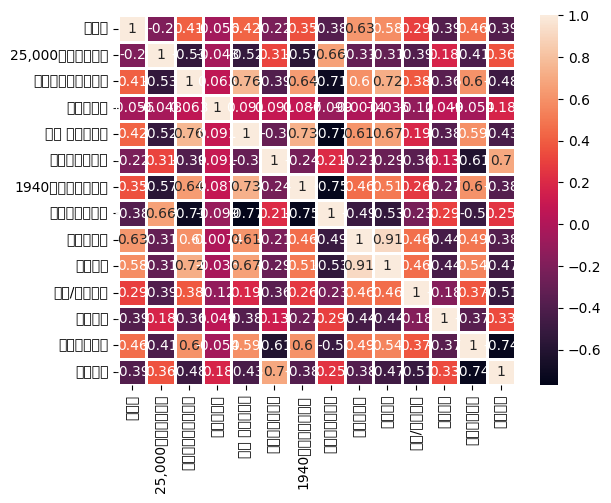

In [17]:
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidth=1)

In [16]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [17]:
data.columns = [col.replace(' ', '').replace(',', '').replace('/','') for col in data.columns]
data.head()

범죄율  25000평방피트초과  비소매상업지역비율  찰스강경계  농축일산화질소  가구당평균방수  1940년이전건축비율  \
0  0.00632         18.0       2.31      0    0.538    6.575         65.2   
1  0.02731          0.0       7.07      0    0.469    6.421         78.9   
2  0.02729          0.0       7.07      0    0.469    7.185         61.1   
3  0.03237          0.0       2.18      0    0.458    6.998         45.8   
4  0.06905          0.0       2.18      0    0.458    7.147         54.2   

   직업센터접근성  도로접근성   재산세율  학생교사비율    흑인비율  하위계층비율  주택가격  
0   4.0900      1  296.0    15.3  396.90    4.98  24.0  
1   4.9671      2  242.0    17.8  396.90    9.14  21.6  
2   4.9671      2  242.0    17.8  392.83    4.03  34.7  
3   6.0622      3  222.0    18.7  394.63    2.94  33.4  
4   6.0622      3  222.0    18.7  396.90    5.33  36.2

In [18]:
data = data.rename(columns={'25000평방피트초과': '평방피트초과_25000', '1940년이전건축비율': '이전건축비율_1940년'})

In [19]:
X = data.drop('주택가격', axis = 1)
y = data['주택가격']

In [20]:
X

범죄율  평방피트초과_25000  비소매상업지역비율  찰스강경계  농축일산화질소  가구당평균방수  이전건축비율_1940년  \
0    0.00632          18.0       2.31      0    0.538    6.575          65.2   
1    0.02731           0.0       7.07      0    0.469    6.421          78.9   
2    0.02729           0.0       7.07      0    0.469    7.185          61.1   
3    0.03237           0.0       2.18      0    0.458    6.998          45.8   
4    0.06905           0.0       2.18      0    0.458    7.147          54.2   
..       ...           ...        ...    ...      ...      ...           ...   
501  0.06263           0.0      11.93      0    0.573    6.593          69.1   
502  0.04527           0.0      11.93      0    0.573    6.120          76.7   
503  0.06076           0.0      11.93      0    0.573    6.976          91.0   
504  0.10959           0.0      11.93      0    0.573    6.794          89.3   
505  0.04741           0.0      11.93      0    0.573    6.030          80.8   

     직업센터접근성  도로접근성   재산세율  학생교사비율    흑인비율  하위계층비율  
0     4.0900      1  296.0    15.3  396.90    4.98  
1     4.9671      2  242.0    17.8  396.90    9.14  
2     4.9671      2  242.0    17.8  392.83    4.03  
3     6.0622      3  222.0    18.7  394.63    2.94  
4     6.0622      3  222.0    18.7  396.90    5.33  
..       ...    ...    ...     ...     ...     ...  
501   2.4786      1  273.0    21.0  391.99    9.67  
502   2.2875      1  273.0    21.0  396.90    9.08  
503   2.1675      1  273.0    21.0  396.90    5.64  
504   2.3889      1  273.0    21.0  393.45    6.48  
505   2.5050      1  273.0    21.0  396.90    7.88  

[506 rows x 13 columns]

In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 주택가격, Length: 506, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

### 다중선형회귀분석하기

In [24]:
# statsmodels R 문법
from statsmodels.formula.api import ols

In [25]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

범죄율  평방피트초과_25000  비소매상업지역비율  찰스강경계  농축일산화질소  가구당평균방수  이전건축비율_1940년  \
355  0.10659          80.0       1.91      0    0.413    5.936          19.5   
460  4.81213           0.0      18.10      0    0.713    6.701          90.0   
120  0.06899           0.0      25.65      0    0.581    5.870          69.7   
346  0.06162           0.0       4.39      0    0.442    5.898          52.3   
457  8.20058           0.0      18.10      0    0.713    5.936          80.3   

     직업센터접근성  도로접근성   재산세율  학생교사비율    흑인비율  하위계층비율  주택가격  
355  10.5857      4  334.0    22.0  376.04    5.57  20.6  
460   2.5975     24  666.0    20.2  255.23   16.42  16.4  
120   2.2577      2  188.0    19.1  389.15   14.37  22.0  
346   8.0136      3  352.0    18.8  364.61   12.67  17.2  
457   2.7792     24  666.0    20.2    3.50   16.94  13.5

In [26]:
data.columns

Index(['범죄율', '평방피트초과_25000', '비소매상업지역비율', '찰스강경계', '농축일산화질소', '가구당평균방수',
       '이전건축비율_1940년', '직업센터접근성', '도로접근성', '재산세율', '학생교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [27]:
lm = ols('주택가격 ~ 평방피트초과_25000 + 비소매상업지역비율+ 찰스강경계+ 농축일산화질소+ 가구당평균방수+ 이전건축비율_1940년+ 직업센터접근성+ 도로접근성+ 재산세율+ 학생교사비율+ 흑인비율+ 하위계층비율', data=train_data).fit()

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   주택가격   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          2.88e-114
Time:                        17:27:02   Log-Likelihood:                -1180.3
No. Observations:                 404   AIC:                             2387.
Df Residuals:                     391   BIC:                             2439.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.2405      5.724      4.235      0.000      12.987      35.494
평방피트초과_25000     0.0269      0.014      1.870      0.062      -0.001       0.055
비소매상업지역비율        0.0321      0.063      0.507      0.613      -0.092       0.156
찰스강경계            2.8930      0.931      3.106      0.002       1.062       4.724
농축일산화질소        -15.1080      4.156     -3.636      0.000     -23.278      -6.938
가구당평균방수          5.1783      0.467     11.077      0.000       4.259       6.097
이전건축비율_1940년    -0.0083      0.014     -0.577      0.564      -0.037       0.020
직업센터접근성         -1.2028      0.208     -5.773      0.000      -1.612      -0.793
도로접근성            0.1999      0.066      3.022      0.003       0.070       0.330
재산세율            -0.0115      0.004     -3.044      0.002      -0.019      -0.004
학생교사비율          -0.9151      0.142     -6.432      0.000      -1.195      -0.635
흑인비율             0.0101      0.003      3.330      0.001       0.004       0.016
하위계층비율          -0.4346      0.056     -7.802      0.000      -0.544      -0.325
==============================================================================
Omnibus:                      127.476   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.619
Skew:                           1.344   Prob(JB):                    2.95e-112
Kurtosis:                       7.826   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

찰스강경계 0.002 = 2.8930
농축일산화질소 0.000 = -15.1080
가구당평균방수 = 5.1783
직업센터접근성 = -1.2028
도로접근성 = 0.1999
재산세율 = -0.0115
학생교사비율 = -0.9151
흑인비율 = 0.0101
하위계층비율 = -0.4346	

Intercept = 24.2405

회귀식
y = (2.8930 * 찰스강경계) + (-15.1080 * 농축일산화질소) + (5.1783 * 가구당평균방수) + (-1.2028 * 직업센터접근성) + (0.1999 * 도로접근성) + (-0.0115 * 재산세율) + (-0.9151 * 학생교사비율) + (0.0101 * 흑인비율) + (-0.4346 * 하위계층비율) + (24.2405)

In [30]:
pred = lm.predict(X_test)

In [31]:
pred

357    22.265324
337    19.231224
327    19.856425
13     19.467021
418    12.282583
         ...    
413    11.817166
408    12.685821
80     28.575090
451    19.399582
26     15.509241
Length: 102, dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
print('Mean_Squared_Error(MSE): ', mean_squared_error(y_test, pred))
print('Root_Mean_Squared_Error(RMSE): ', np.sqrt(mean_squared_error(y_test, pred)))

Mean_Squared_Error(MSE):  33.6767356869188
Root_Mean_Squared_Error(RMSE):  5.803166005459331


In [34]:
p_value = lm.pvalues[1]

C:\Users\5-04\AppData\Local\Temp\ipykernel_7796\2231671448.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = lm.pvalues[1]


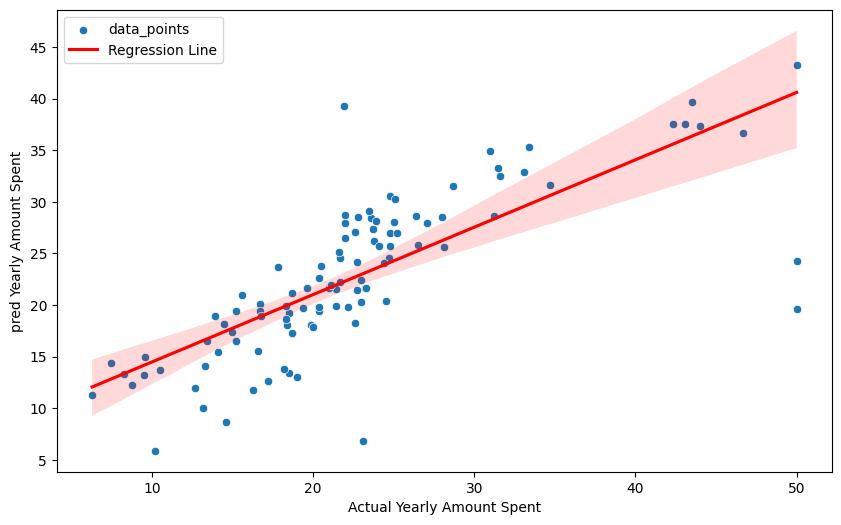

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=pred, label='data_points')
sns.regplot(x=y_test, y=pred, scatter=False, label='Regression Line', color='red')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('pred Yearly Amount Spent')
plt.legend()
plt.show()